In [1]:
# standard imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# score classifiers

from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Section 1: Exploratory Data Analysis


In [3]:
# as always change the drive to your drive

# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/stat335fall22/Exams/Final

In [4]:
#bronze15 contains bronze league match data up to 15 minutes into the game
bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)

#diamond15 contains diamond league match data up to 15 minutes into the game
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)

In [5]:
# check column names (should be the same for both datasets)
bronze15.columns

Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff',
       'blue_ward_destroyed', 'red_ward_destroyed', 'ward_destroyed_diff',
       'first_blood', 'blue_kills', 'red_kills', 'kill_diff', 'first_turret',
       'blue_turrets', 'red_turrets', 'turret_diff', 'first_inhibitor',
       'blue_inhibitors', 'red_inhibitors', 'inhibitor_diff', 'first_herald',
       'blue_heralds', 'red_heralds', 'herald_diff', 'first_baron',
       'blue_barons', 'red_barons', 'baron_diff', 'blue_air', 'red_air',
       'air_diff', 'blue_hextech', 'red_hextech', 'hextech_diff', 'blue_fire',
       'red_fire', 'fire_diff', 'blue_earth', 'red_earth', 'earth_diff',
       'blue_water', 'red_water', 'water_diff', 'air', 'hextech', 'fire',
       'earth', 'water', 'blue_win'],
      dtype='object')

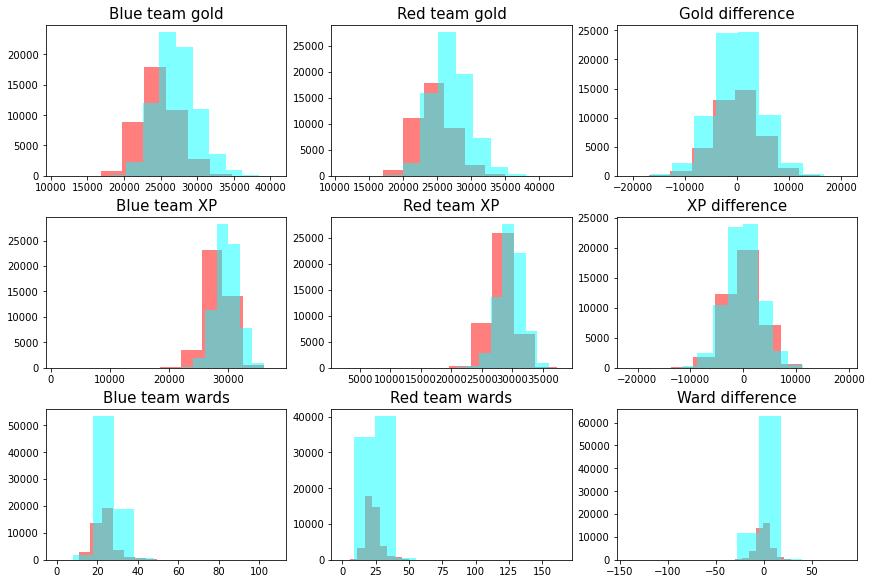

In [6]:
fig, ax = plt.subplots(3, 3, constrained_layout = True, figsize = (12, 8))

# gold histograms
ax[0,0].set_title('Blue team gold', fontsize = 15)
ax[0,0].hist(bronze15['blue_gold'], alpha = 0.5, color = 'red')
ax[0,0].hist(diamond15['blue_gold'], alpha = 0.5, color =  'cyan')
#ax[0,0].legend()

ax[0,1].set_title('Red team gold', fontsize = 15)
ax[0,1].hist(bronze15['red_gold'], alpha = 0.5, color = 'red')
ax[0,1].hist(diamond15['red_gold'], alpha = 0.5, color =  'cyan')
#ax[0,1].legend()

ax[0,2].set_title('Gold difference', fontsize = 15)
ax[0,2].hist(bronze15['gold_diff'], alpha = 0.5, color = 'red')
ax[0,2].hist(diamond15['gold_diff'], alpha = 0.5, color =  'cyan')
#ax[0,2].legend()
# XP histograms

ax[1,0].set_title('Blue team XP', fontsize = 15)
ax[1,0].hist(bronze15['blue_xp'], alpha = 0.5, color = 'red')
ax[1,0].hist(diamond15['blue_xp'], alpha = 0.5, color =  'cyan')
#ax[1,0].legend()

ax[1,1].set_title('Red team XP', fontsize = 15)
ax[1,1].hist(bronze15['red_xp'], alpha = 0.5, color = 'red')
ax[1,1].hist(diamond15['red_xp'], alpha = 0.5, color =  'cyan')
#ax[1,1].legend()

ax[1,2].set_title('XP difference', fontsize = 15)
ax[1,2].hist(bronze15['xp_diff'], alpha = 0.5, color = 'red')
ax[1,2].hist(diamond15['xp_diff'], alpha = 0.5, color =  'cyan')

#ax[1,2].legend()

# Ward histograms
ax[2,0].set_title('Blue team wards', fontsize = 15)
ax[2,0].hist(bronze15['blue_ward_placed'], alpha = 0.5, color = 'red')
ax[2,0].hist(diamond15['blue_ward_placed'], alpha = 0.5, color =  'cyan')
#ax[2,0].legend()

ax[2,1].set_title('Red team wards', fontsize = 15)
ax[2,1].hist(bronze15['red_ward_placed'], alpha = 0.5, color = 'red')
ax[2,1].hist(diamond15['red_ward_placed'], alpha = 0.5, color =  'cyan')
#ax[2,1].legend()

ax[2,2].set_title('Ward difference', fontsize = 15)
ax[2,2].hist(bronze15['ward_placed_diff'], alpha = 0.5, color = 'red')
ax[2,2].hist(diamond15['ward_placed_diff'], alpha = 0.5, color =  'cyan')
#ax[2,2].legend()
plt.show()

In [7]:
variables = ['blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp', 'xp_diff', 'blue_ward_placed','red_ward_placed', 'ward_placed_diff']
sub_bronze = bronze15[variables]
sub_diamond = diamond15[variables]
bronze_means = sub_bronze.mean()
diamond_means = sub_diamond.mean()
diff_means = diamond_means - bronze_means
print("Bronze Player Statistics at 15 Minutes:\n {}".format(bronze_means))
print("Diamond Player Statistics at 15 Minutes:\n {}".format(diamond_means))
print("Difference between Diamond and Bronze players at 15 minutes\n {}".format(diff_means))

Bronze Player Statistics at 15 Minutes:
 blue_gold           24741.497776
red_gold            24619.929064
gold_diff             121.568712
blue_xp             28264.027211
red_xp              28237.312853
xp_diff                26.714358
blue_ward_placed       23.143146
red_ward_placed        22.877839
ward_placed_diff        0.265306
dtype: float64
Diamond Player Statistics at 15 Minutes:
 blue_gold           27233.557712
red_gold            27106.277777
gold_diff             127.279934
blue_xp             29783.161781
red_xp              29813.338185
xp_diff               -30.176404
blue_ward_placed       25.193011
red_ward_placed        25.089547
ward_placed_diff        0.103464
dtype: float64
Difference between Diamond and Bronze players at 15 minutes
 blue_gold           2492.059935
red_gold            2486.348713
gold_diff              5.711222
blue_xp             1519.134570
red_xp              1576.025332
xp_diff              -56.890762
blue_ward_placed       2.049865
red_ward

In the above plots, the red values represent bronze players, and the cyan colors are diamond players. 

We can see that in general, diamond players tend to earn more gold, XP, and place more wards, regardless of team side. 

In other words, the diamond games are a bit closer and more competitive at 15 minutes, quite possibly due to having higher skilled players. There may be a wider variety of player skill levels in bronze lobbies. This would make sense because according to the following article: (https://gameriv.com/league-of-legends-rank-distribution/#:~:text=Overall%20Rank%20Distribution%201%20Iron%3A%207.6%25.%202%20Bronze%3A,7%20Diamond%3A%202.9%25.%208%20Master%3A%200.52%25.%20More%20items), 20% of the League of Legends player base is ranked in Bronze, and 2.9% of the player base is ranked in Diamond. With more players in the bronze rank, it makes sense intuitively that we can expect a bigger gap in skills between players.

In [8]:
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('data/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('data/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('data/timeline_DIAMOND_30.csv', index_col = 0)

bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('data/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('data/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('data/timeline_BRONZE_30.csv', index_col = 0)

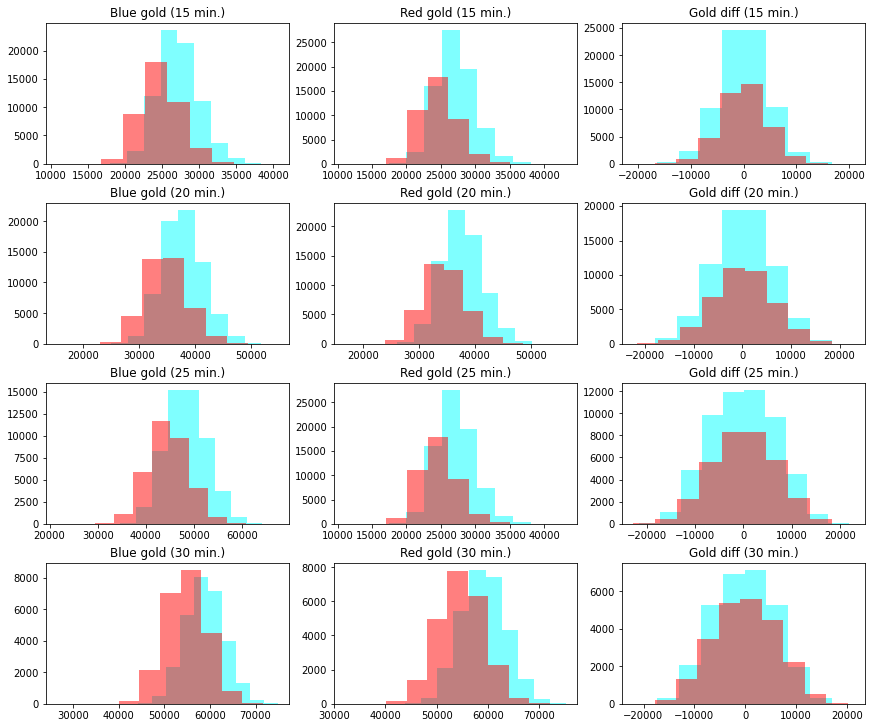

In [9]:
fig, ax = plt.subplots(4, 3, constrained_layout = True, figsize = (12, 10))
mean_data = []

# Gold histograms (15 min)
ax[0,0].set_title('Blue gold (15 min.)')
ax[0,0].hist(diamond15['blue_gold'], alpha = 0.5, color = 'cyan')
ax[0,0].hist(bronze15['blue_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Blue gold (15 min.)', bronze15.mean()['blue_gold'], diamond15.mean()['blue_gold']])

ax[0,1].set_title('Red gold (15 min.)')
ax[0,1].hist(diamond15['red_gold'], alpha = 0.5, color = 'cyan')
ax[0,1].hist(bronze15['red_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Red gold (15 min.)', bronze15.mean()['red_gold'], diamond15.mean()['red_gold']])

ax[0,2].set_title('Gold diff (15 min.)')
ax[0,2].hist(diamond15['gold_diff'], alpha = 0.5, color = 'cyan')
ax[0,2].hist(bronze15['gold_diff'], alpha = 0.5, color = 'red')
mean_data.append(['Gold diff (15 min.)', bronze15.mean()['gold_diff'], diamond15.mean()['gold_diff']])

# Gold histograms (20 min)
ax[1,0].set_title('Blue gold (20 min.)')
ax[1,0].hist(diamond20['blue_gold'], alpha = 0.5, color = 'cyan')
ax[1,0].hist(bronze20['blue_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Blue gold (20 min.)', bronze20.mean()['blue_gold'], diamond20.mean()['blue_gold']])

ax[1,1].set_title('Red gold (20 min.)')
ax[1,1].hist(diamond20['red_gold'], alpha = 0.5, color = 'cyan')
ax[1,1].hist(bronze20['red_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Red gold (20 min.)', bronze20.mean()['red_gold'], diamond20.mean()['red_gold']])

ax[1,2].set_title('Gold diff (20 min.)')
ax[1,2].hist(diamond20['gold_diff'], alpha = 0.5, color = 'cyan')
ax[1,2].hist(bronze20['gold_diff'], alpha = 0.5, color = 'red')
mean_data.append(['Gold diff (20 min.)', bronze20.mean()['gold_diff'], diamond20.mean()['gold_diff']])

# Gold histograms (25 min)
ax[2,0].set_title('Blue gold (25 min.)')
ax[2,0].hist(diamond25['blue_gold'], alpha = 0.5, color = 'cyan')
ax[2,0].hist(bronze25['blue_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Blue gold (25 min.)', bronze25.mean()['blue_gold'], diamond25.mean()['blue_gold']])

ax[2,1].set_title('Red gold (25 min.)')
ax[2,1].hist(diamond15['red_gold'], alpha = 0.5, color = 'cyan')
ax[2,1].hist(bronze15['red_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Red gold (25 min.)', bronze25.mean()['red_gold'], diamond25.mean()['red_gold']])

ax[2,2].set_title('Gold diff (25 min.)')
ax[2,2].hist(diamond25['gold_diff'], alpha = 0.5, color = 'cyan')
ax[2,2].hist(bronze25['gold_diff'], alpha = 0.5, color = 'red')
mean_data.append(['Gold diff (25 min.)', bronze25.mean()['gold_diff'], diamond25.mean()['gold_diff']])

# Gold histograms (30 min)
ax[3,0].set_title('Blue gold (30 min.)')
ax[3,0].hist(diamond30['blue_gold'], alpha = 0.5, color = 'cyan')
ax[3,0].hist(bronze30['blue_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Blue gold (30 min.)', bronze30.mean()['blue_gold'], diamond30.mean()['blue_gold']])

ax[3,1].set_title('Red gold (30 min.)')
ax[3,1].hist(diamond30['red_gold'], alpha = 0.5, color = 'cyan')
ax[3,1].hist(bronze30['red_gold'], alpha = 0.5, color = 'red')
mean_data.append(['Red gold (30 min.)', bronze30.mean()['red_gold'], diamond30.mean()['red_gold']])

ax[3,2].set_title('Gold diff (30 min.)')
ax[3,2].hist(diamond30['gold_diff'], alpha = 0.5, color = 'cyan')
ax[3,2].hist(bronze30['gold_diff'], alpha = 0.5, color = 'red')
mean_data.append(['Gold diff (30 min.)', bronze30.mean()['gold_diff'], diamond30.mean()['gold_diff']])


plt.show()

In [10]:
# create table
mean_table = pd.DataFrame(mean_data, columns = ['Category', 'Bronze Mean', 'Diamond Mean'])
mean_table.head(12)

,Category,Bronze Mean,Diamond Mean
0,Blue gold (15 min.),24741.497776,27233.557712
1,Red gold (15 min.),24619.929064,27106.277777
2,Gold diff (15 min.),121.568712,127.279934
3,Blue gold (20 min.),34690.530151,37820.458150
4,Red gold (20 min.),34509.430812,37697.718769
5,Gold diff (20 min.),181.099339,122.739381
6,Blue gold (25 min.),44605.701921,48392.694304
7,Red gold (25 min.),44481.136954,48380.779924
8,Gold diff (25 min.),124.564967,11.914380
9,Blue gold (30 min.),54729.310733,58955.282586


As we can see, in general, diamond players tend to have more gold than the bronze players. 

This suggests that the diamond players are more capable of utilizing their skills to obtain more resources on the map, shown by higher gold counts at every timestamp. One interesting metric is that the gold difference for 15, 20, and 25 minutes tends to be postive (indicating that the blue side has more gold at the timestamps), but at 30 minutes, the red side tends to have more gold in both bronze and diamond lobbies. 

This may indicate that longer games tend to favor the red side, who eventually tends to get more gold. Interestingly, gold is amost even at 25 minutes for the diamond games, indicating that this is a critical moment in diamond lobbies where teams have even strength and the game hits a turning point, shown by a shift in gold lead from blue side to red side at 30 minutes.

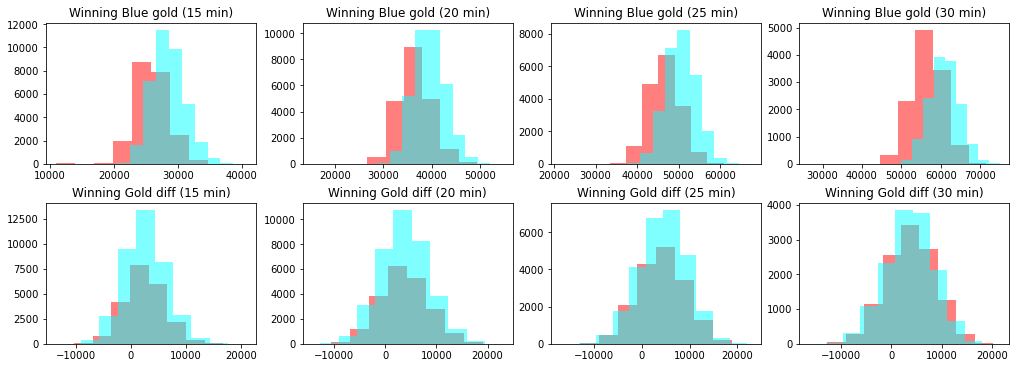

In [11]:
fig, ax = plt.subplots(2, 4, constrained_layout = True, figsize = (14, 5))
bronze15winners = bronze15[bronze15['blue_win'] == 1]
bronze20winners = bronze20[bronze20['blue_win'] == 1]
bronze25winners = bronze25[bronze25['blue_win'] == 1]
bronze30winners = bronze30[bronze30['blue_win'] == 1]

diamond15winners = diamond15[diamond15['blue_win'] == 1]
diamond20winners = diamond20[diamond20['blue_win'] == 1]
diamond25winners = diamond25[diamond25['blue_win'] == 1]
diamond30winners = diamond30[diamond30['blue_win'] == 1]

winner_means = []
# blue gold distribution (winners only)
ax[0,0].set_title('Winning Blue gold (15 min)')
ax[0,0].hist(bronze15winners['blue_gold'], color = 'red', alpha = 0.5)
ax[0,0].hist(diamond15winners['blue_gold'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Blue gold (15 min)', bronze15winners['blue_gold'].mean(),diamond15winners['blue_gold'].mean()])

ax[0,1].set_title('Winning Blue gold (20 min)')
ax[0,1].hist(bronze20winners['blue_gold'], color = 'red', alpha = 0.5)
ax[0,1].hist(diamond20winners['blue_gold'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Blue gold (20 min)', bronze20winners['blue_gold'].mean(),diamond20winners['blue_gold'].mean()])

ax[0,2].set_title('Winning Blue gold (25 min)')
ax[0,2].hist(bronze25winners['blue_gold'], color = 'red', alpha = 0.5)
ax[0,2].hist(diamond25winners['blue_gold'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Blue gold (25 min)', bronze25winners['blue_gold'].mean(),diamond25winners['blue_gold'].mean()])

ax[0,3].set_title('Winning Blue gold (30 min)')
ax[0,3].hist(bronze30winners['blue_gold'], color = 'red', alpha = 0.5)
ax[0,3].hist(diamond30winners['blue_gold'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Blue gold (30 min)', bronze30winners['blue_gold'].mean(),diamond30winners['blue_gold'].mean()])

# gold diff distribution (winners only)
ax[1,0].set_title('Winning Gold diff (15 min)')
ax[1,0].hist(bronze15winners['gold_diff'], color = 'red', alpha = 0.5)
ax[1,0].hist(diamond15winners['gold_diff'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Gold diff (15 min)', bronze15winners['gold_diff'].mean(),diamond15winners['gold_diff'].mean()])

ax[1,1].set_title('Winning Gold diff (20 min)')
ax[1,1].hist(bronze20winners['gold_diff'], color = 'red', alpha = 0.5)
ax[1,1].hist(diamond20winners['gold_diff'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Gold diff (20 min)', bronze20winners['gold_diff'].mean(),diamond20winners['gold_diff'].mean()])

ax[1,2].set_title('Winning Gold diff (25 min)')
ax[1,2].hist(bronze25winners['gold_diff'], color = 'red', alpha = 0.5)
ax[1,2].hist(diamond25winners['gold_diff'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Gold diff (25 min)', bronze25winners['gold_diff'].mean(),diamond25winners['gold_diff'].mean()])

ax[1,3].set_title('Winning Gold diff (30 min)')
ax[1,3].hist(bronze30winners['gold_diff'], color = 'red', alpha = 0.5)
ax[1,3].hist(diamond30winners['gold_diff'], color = 'cyan', alpha = 0.5)
winner_means.append(['Winning Gold diff (30 min)', bronze30winners['gold_diff'].mean(),diamond30winners['gold_diff'].mean()])

plt.show()

In [12]:
# create table
winner_means = pd.DataFrame(winner_means, columns = ['Metric Name', ' Bronze Mean','Diamond Mean'])
winner_means.head(8)

,Metric Name,Bronze Mean,Diamond Mean
0,Winning Blue gold (15 min),25893.674664,28483.645345
1,Winning Blue gold (20 min),36465.827672,39664.889615
2,Winning Blue gold (25 min),46604.352378,50621.178989
3,Winning Blue gold (30 min),56632.105779,60831.249738
4,Winning Gold diff (15 min),2455.904031,2621.463895
5,Winning Gold diff (20 min),3776.496691,3807.514916
6,Winning Gold diff (25 min),4197.648497,4506.325021
7,Winning Gold diff (30 min),3830.244715,3659.378732


As we can see from the above histograms and table, mean gold lead tends to rise between 15-25 minutes in both bronze and diamond games, however there is a slight drop off at 30 minutes.

 This means that leads in this game compound over time - a team that gets ahead continues to snowball their lead as are stronger and thus have a higher likelihood of winning subsequent fights, which will expand their gold lead. This is idea is interesting though, because at 30 minutes, in both ranks, the leads tend to get smaller. This means that maybe there are fights in game or events that happen that may lead to more volatility and changing of the leads. 

In other words, around 25-30 may be a great opportunity for a team to try and get back into the game by evening out the gold lead, as we see the gold lead shift the most in the opposite direction here. 

In general though, the leads in the diamond lobbies tend to be bigger on the winning teams, meaning that diamond players may be better at obtaining and sustaining a lead, but interestingly bronze teams on the blue side have a higher mean gold lead than diamond players at 30 minutes. Perhaps this means that Diamond players are better at closing the gold difference as the game progresses? 

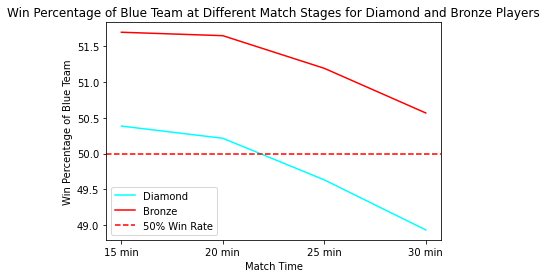

In [13]:
# plot goes here
diamond_win_percentage = [
    diamond15['blue_win'].mean() * 100,
    diamond20['blue_win'].mean() * 100,
    diamond25['blue_win'].mean() * 100,
    diamond30['blue_win'].mean() * 100
]

bronze_win_percentage = [
    bronze15['blue_win'].mean() * 100,
    bronze20['blue_win'].mean() * 100,
    bronze25['blue_win'].mean() * 100,
    bronze30['blue_win'].mean() * 100
]

# Plotting the win percentage for blue team over time
plt.plot(['15 min', '20 min', '25 min', '30 min'], diamond_win_percentage, label='Diamond', color = 'cyan')
plt.plot(['15 min', '20 min', '25 min', '30 min'], bronze_win_percentage, label='Bronze', color = 'red')

# Labeling and titling the plot
plt.xlabel('Match Time')
plt.ylabel('Win Percentage of Blue Team')
plt.title('Win Percentage of Blue Team at Different Match Stages for Diamond and Bronze Players')
plt.axhline(y=50, color='red', linestyle='--', label='50% Win Rate')
plt.legend()
plt.show()


As we can see from our plot, the blue team tends to have a higher winrate in bronze as opposed to diamond games regardless of timestamp.

 Interestingly, in both ranks, the winrate of the blue sides goes down significantly after 20 minutes. In fact, in diamond lobbies, the winrate for the blue side drops below 50% between 20 and 25 minutes. 

This is an indication that blue side has the advantage in the early game, but as the game progresses, the red side tends to be a bit stronger. Furthermore, as we can see from the plot, the seeming advantage that the blue side has is much smaller in the diamond lobbies, indicating that the side of play (red vs blue) matters less as players get better.

# Section 2 Predicting Winners

Now we want to further investigate how bronze and diamond players differ. Since bronze and diamond players have different skill levels, we think their games might be played differently. For example, maybe "xp" and gold are more important to bronze players and "wards" are more important for diamond players.

Lets build some models to predict the winner of a match using the provided match information. We will investigate a few different phenomena

1. Is it easier to predict the outcome of bronze or diamond league matches?
2. Do different features determine the winner between bronze and diamond league players?

In [ ]:
diamond15 = pd.read_csv('data/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('data/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('data/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('data/timeline_DIAMOND_30.csv', index_col = 0)
from sklearn.metrics import accuracy_score

In [16]:
diamond15.columns

Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff',
       'blue_ward_destroyed', 'red_ward_destroyed', 'ward_destroyed_diff',
       'first_blood', 'blue_kills', 'red_kills', 'kill_diff', 'first_turret',
       'blue_turrets', 'red_turrets', 'turret_diff', 'first_inhibitor',
       'blue_inhibitors', 'red_inhibitors', 'inhibitor_diff', 'first_herald',
       'blue_heralds', 'red_heralds', 'herald_diff', 'first_baron',
       'blue_barons', 'red_barons', 'baron_diff', 'blue_air', 'red_air',
       'air_diff', 'blue_hextech', 'red_hextech', 'hextech_diff', 'blue_fire',
       'red_fire', 'fire_diff', 'blue_earth', 'red_earth', 'earth_diff',
       'blue_water', 'red_water', 'water_diff', 'air', 'hextech', 'fire',
       'earth', 'water', 'blue_win'],
      dtype='object')

In [17]:
# 15 minutes
#predictors = ['air_diff','fire_diff','earth_diff','water_diff','duration','gold_diff', 'ward_placed_diff', 'ward_destroyed_diff', 'xp_diff', 'kill_diff', 'turret_diff','inhibitor_diff','first_herald','first_baron']

x15 = diamond15.drop(columns = ['blue_win'])
y15 = diamond15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

model_15_minutes = LogisticRegression()
model_15_minutes.fit(x15_train, y15_train)
predictions_15 = model_15_minutes.predict(x15_test)
probs15 = model_15_minutes.predict_proba(x15_test)
accuracy_15 = accuracy_score(y15_test, predictions_15)
brier_15 = brier_score(y15_test, probs15)

# recommend keeping a consistent naming scheme

# 20 minutes
x20 = diamond20.drop(columns = ['blue_win'])
y20 = diamond20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

model_20_minutes = LogisticRegression()
model_20_minutes.fit(x20_train, y20_train)
predictions_20 = model_20_minutes.predict(x20_test)
probs20 = model_20_minutes.predict_proba(x20_test)
accuracy_20 = accuracy_score(y20_test, predictions_20)
brier_20 = brier_score(y20_test, probs20)

# 25 minutes
x25 = diamond25.drop(columns = ['blue_win'])
y25 = diamond25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)

model_25_minutes = LogisticRegression()
model_25_minutes.fit(x25_train, y25_train)
predictions_25 = model_25_minutes.predict(x25_test)
probs25 = model_25_minutes.predict_proba(x25_test)
accuracy_25 = accuracy_score(y25_test, predictions_25)
brier_25 = brier_score(y25_test, probs25)

# 30 minutes
x30 = diamond30.drop(columns = ['blue_win'])
y30 = diamond30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

model_30_minutes = LogisticRegression()
model_30_minutes.fit(x30_train, y30_train)
predictions_30 = model_30_minutes.predict(x30_test)
probs30 = model_30_minutes.predict_proba(x30_test)
accuracy_30 = accuracy_score(y30_test, predictions_30)
brier_30 = brier_score(y30_test, probs30)

In [18]:
min15importances = abs(model_15_minutes.coef_)
feature15_importance = pd.DataFrame({'Feature': x15.columns, 'Importance': min15importances.flatten()})

min20importances = abs(model_20_minutes.coef_)
feature20_importance = pd.DataFrame({'Feature': x20.columns, 'Importance': min20importances.flatten()})

min25importances = abs(model_25_minutes.coef_)
feature25_importance = pd.DataFrame({'Feature': x25.columns, 'Importance': min25importances.flatten()})

min30importances = abs(model_30_minutes.coef_)
feature30_importance = pd.DataFrame({'Feature': x30.columns, 'Importance': min30importances.flatten()})
print(feature15_importance)
print(feature20_importance)
print(feature25_importance)
print(feature30_importance)

                Feature    Importance
0              duration  1.964559e-07
1             blue_gold  8.998895e-05
2              red_gold  8.405355e-05
3             gold_diff  1.740425e-04
4               blue_xp  6.373944e-05
5                red_xp  5.770502e-05
6               xp_diff  1.214445e-04
7      blue_ward_placed  2.748318e-08
8       red_ward_placed  1.864685e-08
9      ward_placed_diff  4.613004e-08
10  blue_ward_destroyed  1.554850e-08
11   red_ward_destroyed  1.685328e-08
12  ward_destroyed_diff  3.240178e-08
13          first_blood  1.138068e-08
14           blue_kills  1.204277e-07
15            red_kills  1.182375e-07
16            kill_diff  2.386652e-07
17         first_turret  2.254728e-08
18         blue_turrets  2.311485e-08
19          red_turrets  2.238495e-08
20          turret_diff  4.549980e-08
21      first_inhibitor  1.930422e-10
22      blue_inhibitors  1.141646e-10
23       red_inhibitors  9.834219e-11
24       inhibitor_diff  2.125068e-10
25         f

In [19]:
# predict if blue wins
probs15 = model_15_minutes.predict_proba(x15_test)
accuracy_15 = accuracy_score(y15_test, predictions_15)
brier_15 = brier_score(y15_test, probs15)

probs20 = model_20_minutes.predict_proba(x20_test)
accuracy_20 = accuracy_score(y20_test, predictions_20)
brier_20 = brier_score(y20_test, probs20)

probs25 = model_25_minutes.predict_proba(x25_test)
accuracy_25 = accuracy_score(y25_test, predictions_25)
brier_25 = brier_score(y25_test, probs25)

probs30 = model_30_minutes.predict_proba(x30_test)
accuracy_30 = accuracy_score(y30_test, predictions_30)
brier_30 = brier_score(y30_test, probs30)

In [20]:
# create brier and accuracy table
times = ['15 Minutes', '20 Minutes', '25 Minutes', '30 Minutes']
accuracies = [accuracy_15, accuracy_20, accuracy_25, accuracy_30]
brier_scores = [brier_15, brier_20, brier_25, brier_30]
summary_df = pd.DataFrame({'Timestamp Diamond': times, 'Accuracy Score' : accuracies, 'Brier Scores': brier_scores})
summary_df.head(4)

,Timestamp Diamond,Accuracy Score,Brier Scores
0,15 Minutes,0.752946,0.332202
1,20 Minutes,0.792184,0.284395
2,25 Minutes,0.816334,0.257588
3,30 Minutes,0.791727,0.288620


In [21]:
print("Games in 15 minute dataset: {}".format(len(diamond15)))
print("Games in 20 minute dataset: {}".format(len(diamond20)))
print("Games in 25 minute dataset: {}".format(len(diamond25)))
print("Games in 30 minute dataset: {}".format(len(diamond30)))

Games in 15 minute dataset: 75089
Games in 20 minute dataset: 71027
Games in 25 minute dataset: 55022
Games in 30 minute dataset: 29230


As we can see, all of our Brier scores are less than 0.34 and all of our accuracy scores are higher than 0.75.

 In general, our accuracies tend to be higher with the datasets with observations later in the game (accuracy is higher for 25 minute dataset as opposed to 15 minutes), which makes sense because the closer the game is to completion (i.e more time elapsed), the better we can predict the victor. However, this does not hold true for the 30 minute predictions as the model gets slightly less accurate at 30 minutes, perhaps because there are not as many games lasting 30 minutes, leading to a smaller sample size and possibly less accurate predictions.

This may mean that concrete advantages in metrics such as gold or XP mean less amongst good players who can still use other means to outplay their opponents.

 However, despite having the largest sample size, the 15 minute games have the lowest accuracy score and highest Brier score, indicating that outcomes are hardest to predict when only given the 15 minute data. Our best predictions come at 25 minutes, possibly because of a mixture of having a relatively large sample size and being closer to game completion.

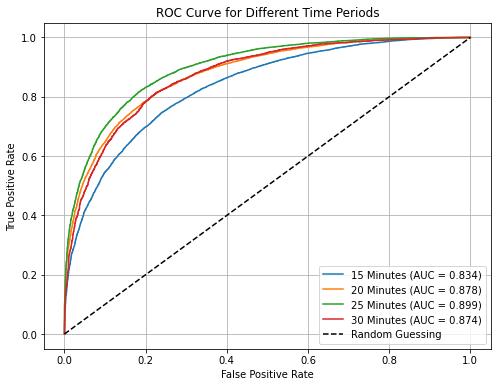

In [22]:
# compute ROC curves and AUC values
# Initialize plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
# Assuming X_test is your test data
fpr, tpr, _ = roc_curve(y15_test, probs15[:,1])
auc = roc_auc_score(y15_test, probs15[:,1])
plt.plot(fpr, tpr, label=f'{"15 Minutes"} (AUC = {auc:.3f})')

fpr, tpr, _ = roc_curve(y20_test, probs20[:,1])
auc = roc_auc_score(y20_test, probs20[:,1])
plt.plot(fpr, tpr, label=f'{"20 Minutes"} (AUC = {auc:.3f})')

fpr, tpr, _ = roc_curve(y25_test, probs25[:,1])
auc = roc_auc_score(y25_test, probs25[:,1])
plt.plot(fpr, tpr, label=f'{"25 Minutes"} (AUC = {auc:.3f})')

fpr, tpr, _ = roc_curve(y30_test, probs30[:,1])
auc = roc_auc_score(y30_test, probs30[:,1])
plt.plot(fpr, tpr, label=f'{"30 Minutes"} (AUC = {auc:.3f})')


# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing', color='black')

# Title and labels
plt.title('ROC Curve for Different Time Periods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

From the curves, games whose data we have at 25 minute are the easiest to predict (green curve). On the other hand, the hardest games to predict are those whose data we have at 15 minutes. This could possibly be due to the fact that when the game is at 15 minutes, there is more time remaining in the game, meaning that there is more time for an event to happen in the game for the tides to change in the game

This would mean that when we have data from later in the game, our models perform better because we have a clearer picture of how the game may unfold because all else equal, the game would be closer to completion. However this does not hold true for 30 minute games. This may be because at this point in the game, leads matter much less because teams are gathering more items and more XP, and each marginal increase in advantages matter less, and the game is more dependent on one teamfight where a team that is behind may have a higher chance at winning. 

In other words, later in the game, tangible leads may win less, leading to less accurate predictions at 30 minutes. However, the general trend remains true that games are easier to predict with data from later in the game, mostly because there is less time remaining, meaning less time for any unexpected changes to happen in the game.

In [23]:
# create table here
feature_summaries = pd.concat([feature15_importance['Importance'], feature20_importance['Importance'],
                               feature25_importance['Importance'], feature30_importance['Importance']], axis=1)

# Set column names
feature_summaries.columns = ['15 Minute Importances', '20 Minutes Importances',
                             '25 Minute Importances', '30 Minutes Importances']

# Add the 'Variable' column (assuming 'Feature' column is common in all DataFrames)
feature_summaries['Variable'] = feature15_importance['Feature']

# Display the resulting DataFrame
feature_summaries.head(len(feature15_importance))

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,1.964559e-07,1.790824e-07,2.290273e-07,3.780853e-08,duration
1,8.998895e-05,7.198555e-05,6.873958e-05,6.049831e-05,blue_gold
2,8.405355e-05,6.421320e-05,6.135602e-05,6.388509e-05,red_gold
3,1.740425e-04,1.361988e-04,1.300956e-04,1.243834e-04,gold_diff
4,6.373944e-05,6.750867e-05,5.049979e-05,4.398807e-05,blue_xp
5,5.770502e-05,6.626111e-05,4.905328e-05,3.964967e-05,red_xp
6,1.214445e-04,1.337698e-04,9.955306e-05,8.363774e-05,xp_diff
7,2.748318e-08,4.198040e-08,5.837756e-08,9.548903e-08,blue_ward_placed
8,1.864685e-08,4.934189e-08,4.679714e-08,4.755800e-08,red_ward_placed
9,4.613004e-08,9.132229e-08,1.051747e-07,1.430470e-07,ward_placed_diff


In [24]:
min15sorted_feature_summaries = feature_summaries.sort_values('15 Minute Importances', ascending=False)
min15sorted = min15sorted_feature_summaries.head(5).reset_index().drop(columns = ['index'])
min15sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000090,0.000072,0.000069,0.000060,blue_gold
3,0.000084,0.000064,0.000061,0.000064,red_gold
4,0.000064,0.000068,0.000050,0.000044,blue_xp


In [25]:
min20sorted_feature_summaries = feature_summaries.sort_values('20 Minutes Importances', ascending=False)
min20sorted = min20sorted_feature_summaries.head(5).reset_index().drop(columns = ['index'])
min20sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000090,0.000072,0.000069,0.000060,blue_gold
3,0.000064,0.000068,0.000050,0.000044,blue_xp
4,0.000058,0.000066,0.000049,0.000040,red_xp


In [26]:
min25sorted_feature_summaries = feature_summaries.sort_values('25 Minute Importances', ascending=False)
min25sorted = min25sorted_feature_summaries.head(5).reset_index().drop(columns = ['index'])
min25sorted.head()


,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000090,0.000072,0.000069,0.000060,blue_gold
3,0.000084,0.000064,0.000061,0.000064,red_gold
4,0.000064,0.000068,0.000050,0.000044,blue_xp


In [27]:
min30sorted_feature_summaries = feature_summaries.sort_values('30 Minutes Importances', ascending=False)
min30sorted = min30sorted_feature_summaries.head(5).reset_index().drop(columns = ['index']) 
min30sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000084,0.000064,0.000061,0.000064,red_gold
3,0.000090,0.000072,0.000069,0.000060,blue_gold
4,0.000064,0.000068,0.000050,0.000044,blue_xp


In [28]:
print("Important predictors at 15 minutes:\n {}".format(list(min15sorted['Variable'])))
print("Important predictors at 20 minutes:\n {}".format(list(min20sorted['Variable'])))
print("Important predictors at 25 minutes:\n {}".format(list(min25sorted['Variable'])))
print("Important predictors at 30 minutes:\n {}".format(list(min30sorted['Variable'])))

Important predictors at 15 minutes:
 ['gold_diff', 'xp_diff', 'blue_gold', 'red_gold', 'blue_xp']
Important predictors at 20 minutes:
 ['gold_diff', 'xp_diff', 'blue_gold', 'blue_xp', 'red_xp']
Important predictors at 25 minutes:
 ['gold_diff', 'xp_diff', 'blue_gold', 'red_gold', 'blue_xp']
Important predictors at 30 minutes:
 ['gold_diff', 'xp_diff', 'red_gold', 'blue_gold', 'blue_xp']


Above, we can see the most important predictors at each time stamp. 

For 15 minutes: gold diff, xp diff, blue gold, red gold, blue xp. 

For 20 minutes: gold diff, xp diff, blue gold, blue xp, red xp. 

For 25 minutes: gold diff, xp diff, blue gold, red gold, blue xp.

For 30 minutes: gold diff, xp diff, red gold, blue gold, blue xp. 

In general, these variables are mostly the same, centering around gold, and xp, the two most quantitative metrics for player strength. From the tables above, we can see a general trend that gold difference tends to be a weaker predictor as the game goes on, indicating that gold difference of the same magnitude matters less as the game progresses, because other factors such as dragons and wards may be more important. XP difference matters more at 20 minutes than it does at other timestamps, suggesting that level differences mean most in the mid-game, but are less impactful later on.

In [29]:
bronze15 = pd.read_csv('data/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('data/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('data/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('data/timeline_BRONZE_30.csv', index_col = 0)

In [30]:
# 15 minutes
x15 = bronze15.drop(columns = ['blue_win'])
y15 = bronze15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

model_15_minutes = LogisticRegression()
model_15_minutes.fit(x15_train, y15_train)
predictions_15 = model_15_minutes.predict(x15_test)
probs15 = model_15_minutes.predict_proba(x15_test)
accuracy_15 = accuracy_score(y15_test, predictions_15)
brier_15 = brier_score(y15_test, probs15)

# recommend keeping a consistent naming scheme

# 20 minutes
x20 = bronze20.drop(columns = ['blue_win'])
y20 = bronze20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

model_20_minutes = LogisticRegression()
model_20_minutes.fit(x20_train, y20_train)
predictions_20 = model_20_minutes.predict(x20_test)
probs20 = model_20_minutes.predict_proba(x20_test)
accuracy_20 = accuracy_score(y20_test, predictions_20)
brier_20 = brier_score(y20_test, probs20)

# 25 minutes
x25 = bronze25.drop(columns = ['blue_win'])
y25 = bronze25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)

model_25_minutes = LogisticRegression()
model_25_minutes.fit(x25_train, y25_train)
predictions_25 = model_25_minutes.predict(x25_test)
probs25 = model_25_minutes.predict_proba(x25_test)
accuracy_25 = accuracy_score(y25_test, predictions_25)
brier_25 = brier_score(y25_test, probs25)

# 30 minutes
x30 = bronze30.drop(columns = ['blue_win'])
y30 = bronze30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

model_30_minutes = LogisticRegression()
model_30_minutes.fit(x30_train, y30_train)
predictions_30 = model_30_minutes.predict(x30_test)
probs30 = model_30_minutes.predict_proba(x30_test)
accuracy_30 = accuracy_score(y30_test, predictions_30)
brier_30 = brier_score(y30_test, probs30)

In [31]:
min15importances = abs(model_15_minutes.coef_)
feature15_importance = pd.DataFrame({'Feature': x15.columns, 'Importance': min15importances.flatten()})

min20importances = abs(model_20_minutes.coef_)
feature20_importance = pd.DataFrame({'Feature': x20.columns, 'Importance': min20importances.flatten()})

min25importances = abs(model_25_minutes.coef_)
feature25_importance = pd.DataFrame({'Feature': x25.columns, 'Importance': min25importances.flatten()})

min30importances = abs(model_30_minutes.coef_)
feature30_importance = pd.DataFrame({'Feature': x30.columns, 'Importance': min30importances.flatten()})


In [32]:
feature15_importance.head()

,Feature,Importance
0,duration,4.440408e-08
1,blue_gold,1.182657e-04
2,red_gold,1.054439e-04
3,gold_diff,2.237096e-04
4,blue_xp,2.521148e-05


In [33]:
feature20_importance.head()

,Feature,Importance
0,duration,1.526478e-08
1,blue_gold,8.522986e-05
2,red_gold,8.190461e-05
3,gold_diff,1.671345e-04
4,blue_xp,4.536104e-05


In [34]:
feature25_importance.head()

,Feature,Importance
0,duration,6.205991e-08
1,blue_gold,7.898087e-05
2,red_gold,7.911314e-05
3,gold_diff,1.580940e-04
4,blue_xp,4.290926e-05


In [35]:
feature30_importance.head()

,Feature,Importance
0,duration,9.855664e-09
1,blue_gold,7.971553e-05
2,red_gold,8.460982e-05
3,gold_diff,1.643253e-04
4,blue_xp,3.311647e-05


In [36]:
# create brier and accuracy table
# predict if blue wins
probs15 = model_15_minutes.predict_proba(x15_test)
accuracy_15 = accuracy_score(y15_test, predictions_15)
brier_15 = brier_score(y15_test, probs15)

probs20 = model_20_minutes.predict_proba(x20_test)
accuracy_20 = accuracy_score(y20_test, predictions_20)
brier_20 = brier_score(y20_test, probs20)

probs25 = model_25_minutes.predict_proba(x25_test)
accuracy_25 = accuracy_score(y25_test, predictions_25)
brier_25 = brier_score(y25_test, probs25)

probs30 = model_30_minutes.predict_proba(x30_test)
accuracy_30 = accuracy_score(y30_test, predictions_30)
brier_30 = brier_score(y30_test, probs30)

In [37]:
#Reiterating Accuracies for diamond games
summary_df.head(4)

,Timestamp Diamond,Accuracy Score,Brier Scores
0,15 Minutes,0.752946,0.332202
1,20 Minutes,0.792184,0.284395
2,25 Minutes,0.816334,0.257588
3,30 Minutes,0.791727,0.288620


In [38]:
# create brier and accuracy table for bronze
times = ['15 Minutes', '20 Minutes', '25 Minutes', '30 Minutes']
accuracies = [accuracy_15, accuracy_20, accuracy_25, accuracy_30]
brier_scores = [brier_15, brier_20, brier_25, brier_30]
bronzesummary_df = pd.DataFrame({'Timestamp Bronze': times, 'Accuracy Score' : accuracies, 'Brier Scores': brier_scores})
bronzesummary_df.head(4)

,Timestamp Bronze,Accuracy Score,Brier Scores
0,15 Minutes,0.748926,0.330467
1,20 Minutes,0.791911,0.287416
2,25 Minutes,0.799837,0.275017
3,30 Minutes,0.802247,0.278069


As we can see above, the general trend for the bronze games is that the model gets more accurate as the game progresses.

 This is different from diamond lobbies because the diamond games get harder to predict at 30 minutes, but it gets easier to predict in bronze games. This suggests that in Diamond games, other factors not captured in our core metrics become more important as the game progresses, but bronze players may not have those same skills, so that extra factor isn't as impactful for the bronze lobbies, leading to our model becoming more accurate as the game progresses and as the game nears completion. 

Alongside the accuracy score increasing, the Brier scores roughly decrease, but rise slightly at 30 minutes, but by a very small amount, not enough to be alarming, because our accuracy score is still higher.

In [39]:
# create table here
min15importances = abs(model_15_minutes.coef_)
feature15_importance = pd.DataFrame({'Feature': x15.columns, 'Importance': min15importances.flatten()})

min20importances = abs(model_20_minutes.coef_)
feature20_importance = pd.DataFrame({'Feature': x20.columns, 'Importance': min20importances.flatten()})

min25importances = abs(model_25_minutes.coef_)
feature25_importance = pd.DataFrame({'Feature': x25.columns, 'Importance': min25importances.flatten()})

min30importances = abs(model_30_minutes.coef_)
feature30_importance = pd.DataFrame({'Feature': x30.columns, 'Importance': min30importances.flatten()})

In [40]:
feature15_importance.head()

,Feature,Importance
0,duration,4.440408e-08
1,blue_gold,1.182657e-04
2,red_gold,1.054439e-04
3,gold_diff,2.237096e-04
4,blue_xp,2.521148e-05


In [41]:
feature20_importance.head()

,Feature,Importance
0,duration,1.526478e-08
1,blue_gold,8.522986e-05
2,red_gold,8.190461e-05
3,gold_diff,1.671345e-04
4,blue_xp,4.536104e-05


In [42]:
feature25_importance.head()

,Feature,Importance
0,duration,6.205991e-08
1,blue_gold,7.898087e-05
2,red_gold,7.911314e-05
3,gold_diff,1.580940e-04
4,blue_xp,4.290926e-05


In [43]:
feature30_importance.head()

,Feature,Importance
0,duration,9.855664e-09
1,blue_gold,7.971553e-05
2,red_gold,8.460982e-05
3,gold_diff,1.643253e-04
4,blue_xp,3.311647e-05


In [44]:
min15sorted_feature_summaries = feature_summaries.sort_values('15 Minute Importances', ascending=False)
min15sorted = min15sorted_feature_summaries.head(5).reset_index().drop(columns = ['index'])

min20sorted_feature_summaries = feature_summaries.sort_values('20 Minutes Importances', ascending=False)
min20sorted = min20sorted_feature_summaries.head(5).reset_index().drop(columns = ['index'])

min25sorted_feature_summaries = feature_summaries.sort_values('25 Minute Importances', ascending=False)
min25sorted = min25sorted_feature_summaries.head(5).reset_index().drop(columns = ['index'])

min30sorted_feature_summaries = feature_summaries.sort_values('30 Minutes Importances', ascending=False)
min30sorted = min30sorted_feature_summaries.head(5).reset_index().drop(columns = ['index']) 



In [45]:
min15sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000090,0.000072,0.000069,0.000060,blue_gold
3,0.000084,0.000064,0.000061,0.000064,red_gold
4,0.000064,0.000068,0.000050,0.000044,blue_xp


In [46]:
min20sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000090,0.000072,0.000069,0.000060,blue_gold
3,0.000064,0.000068,0.000050,0.000044,blue_xp
4,0.000058,0.000066,0.000049,0.000040,red_xp


In [47]:
min25sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000090,0.000072,0.000069,0.000060,blue_gold
3,0.000084,0.000064,0.000061,0.000064,red_gold
4,0.000064,0.000068,0.000050,0.000044,blue_xp


In [48]:
min30sorted.head()

,15 Minute Importances,20 Minutes Importances,25 Minute Importances,30 Minutes Importances,Variable
0,0.000174,0.000136,0.000130,0.000124,gold_diff
1,0.000121,0.000134,0.000100,0.000084,xp_diff
2,0.000084,0.000064,0.000061,0.000064,red_gold
3,0.000090,0.000072,0.000069,0.000060,blue_gold
4,0.000064,0.000068,0.000050,0.000044,blue_xp


In [49]:
print("Important predictors at 15 minutes:\n {}".format(list(min15sorted['Variable'])))
print("Important predictors at 20 minutes:\n {}".format(list(min20sorted['Variable'])))
print("Important predictors at 25 minutes:\n {}".format(list(min25sorted['Variable'])))
print("Important predictors at 30 minutes:\n {}".format(list(min30sorted['Variable'])))

Important predictors at 15 minutes:
 ['gold_diff', 'xp_diff', 'blue_gold', 'red_gold', 'blue_xp']
Important predictors at 20 minutes:
 ['gold_diff', 'xp_diff', 'blue_gold', 'blue_xp', 'red_xp']
Important predictors at 25 minutes:
 ['gold_diff', 'xp_diff', 'blue_gold', 'red_gold', 'blue_xp']
Important predictors at 30 minutes:
 ['gold_diff', 'xp_diff', 'red_gold', 'blue_gold', 'blue_xp']


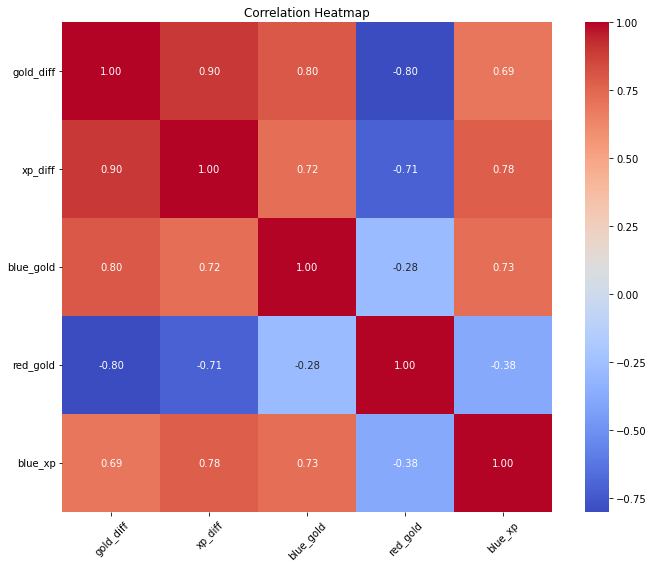

In [50]:
import seaborn as sns
top_features = x15[list(min15sorted['Variable'])]

df_corr = top_features.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Customize the plot (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()

Model feature importances are shown above for the models predicting the outcome of League of Legends games in bronze lobbies. 

The key difference across the bronze models is that red gold matters more than blue gold in 30 minute games. More generally, the top 5 predictors for bronze League of Legends games are about the same as in the diamond games, centering around gold and XP between the two teams. This is further indication that these two metrics (gold and XP), more specifically gold lead and XP leads, are universal determinants of outcomes in League of Legends games, regardless of rank that the game is played in. 

As we can see, MANY of these variables are correlated with each other, which makes sense, as gold_diff is a function of red gold and blue gold, likewise for XP diff being a function of blue XP and red XP. 

Since our model contains correlated predictors, it's hard to isolate the impact of each individual predictor. For a future study, I would suggest trying to eliminate related variables in order to create a model that only contains unique predictors. This would make it so that we could get a better grasp of how each unique variable can impact the outcome of a League of Legends game. 